# STO-LTO STEM simulation

authors: [Toma Susi]
date: 2024/09/02

In [3]:
import ase
import abtem
import matplotlib.pyplot as plt

atoms = ase.io.read("data/sto_lto.cif")
potential = abtem.Potential(atoms, sampling=0.05, slice_thickness=2)

probe = abtem.Probe(energy=150e3, defocus=50, semiangle_cutoff=20, Cs=0.0)

probe.grid.match(potential)

scan = abtem.GridScan(
    start=(0, 0),
    end=(1 / 3, 1),
    sampling=probe.ctf.nyquist_sampling, # Equal to 0.36963 A
    fractional=True,
    potential=potential,
)

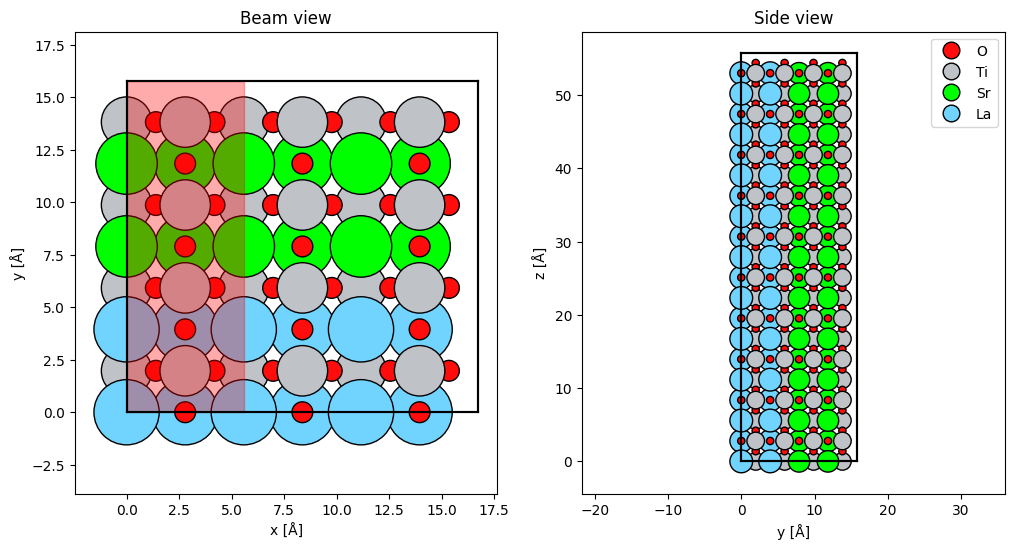

In [5]:
#| label: app:stem_sto-lto_scan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
abtem.show_atoms(atoms, ax=ax1, plane="xy", title="Beam view")
abtem.show_atoms(atoms, ax=ax2, plane="yz", title="Side view", legend=True);

scan.add_to_plot(ax1);

In [6]:
bright = abtem.AnnularDetector(inner=0, outer=20)
maadf = abtem.AnnularDetector(inner=40, outer=100)
haadf = abtem.AnnularDetector(inner=100, outer=180)

detectors = [bright, maadf, haadf]

In [7]:
scanned_measurements = probe.scan(
    scan=scan,
    detectors=detectors,
    potential=potential,
)

scanned_measurements.compute()

stacked_measurements = abtem.stack(scanned_measurements, ("BF", "MAADF", "HAADF"))

stacked_measurements.to_zarr("data/STO_LTO_STEM.zarr");

[########################################] | 100% Completed | 43.25 s
[########################################] | 100% Completed | 102.37 ms


[[None]]

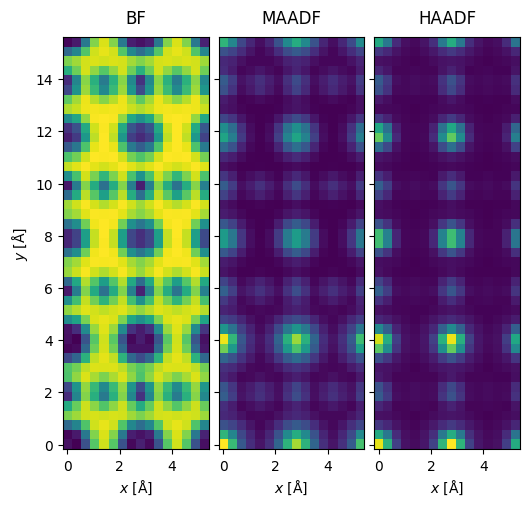

In [9]:
#| label: app:stem_sto-lto_image
stacked_measurements.show(explode=True)
plt.savefig("../static/stem_images.png", dpi=600)